## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Jacob\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [3]:
dataset_path = "C:/Users/Jacob/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1"

files = os.listdir(dataset_path)
print(files)


['online_retail_II.xlsx']


In [4]:
file_path = "C:/Users/Jacob/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1/online_retail_II.xlsx"

df = pd.read_excel(file_path)

In [5]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [7]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [8]:
# Fill missing 'Description' using the most common value per 'StockCode'
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

#Drop rows where 'Customer ID' is missing
df = df.dropna(subset=['Customer ID'])

print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [9]:
print(df.duplicated().sum())

6771


In [10]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [11]:
row = df[df["Invoice"] == "C489449"]
row

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [12]:
df = df[df["Invoice"].apply(lambda x: "C" not in str(x))] ##Removing all refunds

In [13]:
df[["Quantity"]].describe()

,Quantity
count,400947.000000
mean,13.768523
std,97.639816
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,19152.000000


In [14]:
df[["Price"]].describe()

,Price
count,400947.000000
mean,3.305571
std,35.046376
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,10953.500000


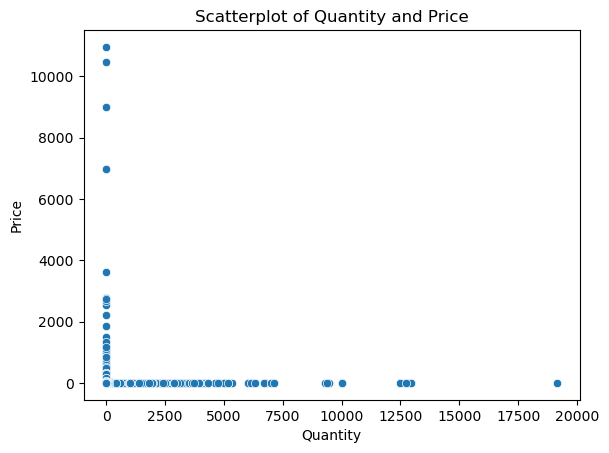

In [16]:
sns.scatterplot(data = df, x = "Quantity", y = "Price")
plt.title("Scatterplot of Quantity and Price")
plt.show()

In [33]:
products_num = df.groupby(["Invoice", "Customer ID"], as_index=False)["Quantity"].count()
products_num

,Invoice,Customer ID,Quantity
0,489434,13085.0,8
1,489435,13085.0,4
2,489436,13078.0,19
3,489437,15362.0,23
4,489438,18102.0,17
...,...,...,...
19210,538167,14713.0,25
19211,538168,14702.0,29
19212,538169,13230.0,13
19213,538170,13969.0,25


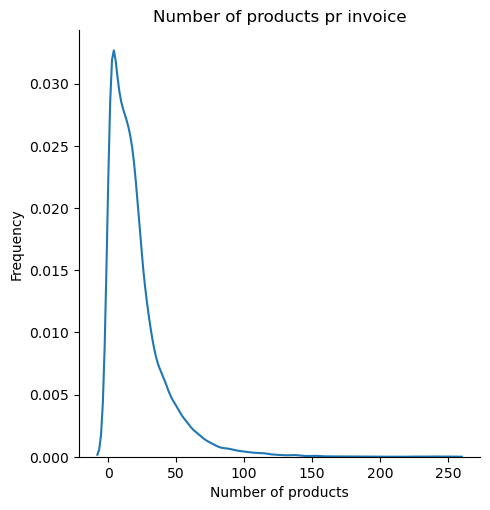

In [43]:

sns.displot(data=products_num, x="Quantity", kind ="kde")
plt.title("Number of products pr invoice")
plt.xlabel("Number of products")
plt.ylabel("Frequency")
plt.show()

In [17]:
df_by_country = df["Quantity"].groupby(df["Country"]).describe()
df_by_country

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,630.0,32.046032,56.120805,1.0,6.00,12.0,24.00,480.0
Austria,524.0,12.780534,11.331588,1.0,6.00,12.0,16.00,120.0
Bahrain,42.0,11.785714,8.095575,2.0,6.50,12.0,12.00,48.0
Belgium,1037.0,11.638380,11.559373,1.0,6.00,10.0,12.00,120.0
Brazil,62.0,3.048387,3.672795,1.0,1.00,2.0,3.00,25.0
Canada,77.0,11.610390,6.370483,2.0,6.00,12.0,16.00,24.0
Channel Islands,821.0,14.605359,24.326693,1.0,4.00,10.0,12.00,300.0
Cyprus,533.0,8.649156,17.449034,1.0,2.00,6.0,12.00,200.0
Denmark,418.0,549.497608,1962.324114,1.0,12.00,24.0,48.00,19152.0


In [44]:
df["Quantity"].corr(df["Price"])

np.float64(-0.006887723359586917)

In [ ]:
df_group = df["Quantity"].groupby(df["Country"]).describe()
df_group

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,630.0,32.046032,56.120805,1.0,6.00,12.0,24.00,480.0
Austria,524.0,12.780534,11.331588,1.0,6.00,12.0,16.00,120.0
Bahrain,42.0,11.785714,8.095575,2.0,6.50,12.0,12.00,48.0
Belgium,1037.0,11.638380,11.559373,1.0,6.00,10.0,12.00,120.0
Brazil,62.0,3.048387,3.672795,1.0,1.00,2.0,3.00,25.0
Canada,77.0,11.610390,6.370483,2.0,6.00,12.0,16.00,24.0
Channel Islands,821.0,14.605359,24.326693,1.0,4.00,10.0,12.00,300.0
Cyprus,533.0,8.649156,17.449034,1.0,2.00,6.0,12.00,200.0
Denmark,418.0,549.497608,1962.324114,1.0,12.00,24.0,48.00,19152.0


In [ ]:
df_group = df["Price"].groupby(df["Country"]).describe()
df_group

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,630.0,4.630746,30.770929,0.29,1.25,1.950,3.750,662.25
Austria,524.0,4.301164,10.626897,0.12,1.25,1.650,3.375,130.00
Bahrain,42.0,2.180000,1.872718,0.42,1.25,1.470,2.850,9.95
Belgium,1037.0,5.427753,47.666829,0.00,1.25,1.950,3.750,1508.65
Brazil,62.0,1.834032,1.315761,0.21,0.85,1.550,2.550,6.95
Canada,77.0,1.915714,1.329242,0.29,0.85,1.650,2.950,5.95
Channel Islands,821.0,4.733459,7.786410,0.21,1.25,2.100,5.950,145.00
Cyprus,533.0,4.418931,6.271802,0.29,1.49,2.950,5.950,79.95
Denmark,418.0,2.589522,3.313035,0.06,0.55,1.650,3.350,18.00


In [ ]:
df_group = df["Price"].groupby([df["Invoice"], df["Customer ID"]]).describe()
df_group

,,count,mean,std,min,25%,50%,75%,max
Invoice,Customer ID,,,,,,,,
489434,13085.0,8.0,4.081250,2.721205,1.25,1.550,4.025,6.75,6.95
489435,13085.0,4.0,2.625000,0.861684,1.65,2.325,2.550,2.85,3.75
489436,13078.0,19.0,3.730526,2.215269,1.25,1.670,3.390,5.70,8.50
489437,15362.0,23.0,3.628261,2.697424,0.65,1.250,2.950,4.95,9.95
489438,18102.0,17.0,2.591176,1.540588,0.98,1.900,2.400,2.50,6.40
...,...,...,...,...,...,...,...,...,...
538167,14713.0,25.0,3.046000,2.520455,0.85,1.650,2.100,3.75,12.75
538168,14702.0,29.0,2.320690,1.549338,0.55,1.250,1.650,2.95,6.75
538169,13230.0,13.0,3.015385,2.213536,0.85,1.450,2.100,3.75,7.95


#### Feature creation:

* Revenue

In [ ]:
df["Revenue"] = df["Quantity"] * df["Price"]

  *   DayOfWeek: to analyze sales trends by weekdays.

In [ ]:
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek ## Mon = 0, sun = 6

  *   TotalRevenue for each CustomerID

In [ ]:
df.groupby("Customer ID")["Revenue"].sum().describe()

count      4314.000000
mean       2039.460766
std        8909.797773
min           0.000000
25%         307.105000
50%         700.405000
75%        1713.297500
max      349164.350000
Name: Revenue, dtype: float64

In [ ]:
df.groupby("Customer ID")["Revenue"].sum().reset_index()

,Customer ID,Revenue
0,12346.0,372.86
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2671.14
4,12351.0,300.93
...,...,...
4309,18283.0,619.37
4310,18284.0,461.68
4311,18285.0,427.00
4312,18286.0,1296.43


In [ ]:
df["total_revenue"] = df["Customer ID"].map(df.groupby("Customer ID")["Revenue"].sum())
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,total_revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,1,2017.20
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1,2017.20
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1,2017.20
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,1,2017.20
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,1,2017.20
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,3,725.21
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,3,725.21
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,3,725.21
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,3,725.21


In [ ]:
df_filtered = df[df["Customer ID"] == 13085.0]
df_filtered["Revenue"].sum()

np.float64(2017.2)

In [ ]:
is_equal = (df[df["Customer ID"] == 13085.0]["total_revenue"].iloc[0] == df_filtered["Revenue"].sum())
is_equal

np.True_

*  Most popular product based on Revenue.

In [ ]:
product = df.groupby(["StockCode", "Description"])["Revenue"].sum().idxmax()
product

('85123A', 'WHITE HANGING HEART T-LIGHT HOLDER')

In [ ]:
df["MostPopularProduct"] = df[["StockCode", "Description"]].apply(lambda row: (row["StockCode"], row["Description"]) == product, axis =1) ##Row-wise comparison

In [ ]:
jacob = df[df["StockCode"] == "85123A"]
jacob

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,total_revenue,MostPopularProduct
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom,17.70,1,1928.13,True
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom,81.60,1,6226.43,True
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom,163.20,1,18320.17,True
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom,2.95,1,1664.92,True
403,489519,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 11:37:00,2.55,17700.0,United Kingdom,81.60,1,4145.33,True
...,...,...,...,...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom,41.30,3,3062.52,True
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain,2.95,3,363.66,True
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,3,383.07,True
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom,11.80,3,5266.77,True


In [ ]:
sorted_top_products = product.sort_values(ascending = False)
sorted_top_products.head()

AttributeError: 'tuple' object has no attribute 'sort_values'

* Ordersize by summing Quantity for each InvoiceNo

In [ ]:
df["OrderSize"] = df.groupby("Invoice")["Quantity"].transform("sum")

### 5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".

* Customers segmentet into tiers based on Total Revennue

In [ ]:
df["segment"] = df["total_revenue"].apply(lambda revenue: "Low" if revenue < 58 else ("Medium" if revenue <= 139 else "High"))

* Extract key information from Description...

In [ ]:
words=["gift", "Discount"]
for word in words:
    df[word] = df['Description'].apply(lambda x: any(word in x.lower() for word in words))

In [ ]:
df['Discount'].value_counts()


In [ ]:
df[df['Discount'] == True]

  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.

In [ ]:
df["Revenue"].describe()

In [ ]:
df["transaction_size"] = df["Revenue"].apply(lambda revenue: "Small" if revenue < 6 else ("Medium" if revenue <= 13 else "High"))

In [ ]:
df[["Invoice", "transaction_size"]]

  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.

In [ ]:
words=["gift", "gifts", "christmas", "xmas", "holiday", "winther", "tree", "merry" ]

df["is_christmas_themed"] = df["Description"].apply(lambda x: any(word in x.lower() for word in words))

* Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy["NumPurchase"] = df_copy.groupby("Customer ID")["Invoice"].transform("count")
df_copy

In [ ]:
df_copy.describe()

In [ ]:
df_copy["loyalty"] = df_copy["NumPurchase"].apply(lambda num: "One-time" if num == 1 else ("Occasional" if num <=88 else ("Loyal" if num > 88 else None)))

In [ ]:
loyal_customers = df_copy[df_copy["loyalty"] == "Occasional"]
loyal_customers

  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".

In [ ]:
df["Multi-Item Order"] = df.groupby("Invoice")["StockCode"].transform("nunique").apply(lambda x: True if x > 1 else False)

In [ ]:
df["Multi-Item Order"].value_counts()

7. Wrap all fo the above into an ETL pipeline.

In [ ]:
def extract(dataset_path):
        file_path = "/online_retail_II.xlsx"
        df = pd.read_excel(dataset_path+file_path)
        return df

def transform(df):
        # Fill missing 'Description' using the most common value per 'StockCode'
        df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

        #Drop rows where 'Customer ID' is missing
        df = df.dropna(subset=['Customer ID'])

        df.drop_duplicates(inplace=True)

        df = df[df["Invoice"].apply(lambda x: "C" not in str(x))] ##Removing all refunds

        # Feature creation:
        df["Revenue"] = df["Quantity"] * df["Price"]

        df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek ## Mon = 0, sun = 6

        df["total_revenue"] = df["Customer ID"].map(df.groupby("Customer ID")["Revenue"].sum())

        product = df.groupby(["StockCode", "Description"])["Revenue"].sum().idxmax()
        df["MostPopularProduct"] = df[["StockCode", "Description"]].apply(lambda row: (row["StockCode"], row["Description"]) == product, axis =1) ##Row-wise comparison

        
        df["OrderSize"] = df.groupby("Invoice")["Quantity"].transform("sum")

        df["segment"] = df["total_revenue"].apply(lambda revenue: "Low" if revenue < 58 else ("Medium" if revenue <= 139 else "High")) ##Customer segment, based on revenue

        words=["gift", "Discount"]
        for word in words:
                df[word] = df['Description'].apply(lambda x: any(word in x.lower() for word in words)) ##Registrer key info

        df["transaction_size"] = df["Revenue"].apply(lambda revenue: "Small" if revenue < 6 else ("Medium" if revenue <= 13 else "High"))

        words=["gift", "gifts", "christmas", "xmas", "holiday", "winther", "tree", "merry" ]
        df["is_christmas_themed"] = df["Description"].apply(lambda x: any(word in x.lower() for word in words)) ##Detect seasonal items
        
        df["NumPurchase"] = df.groupby("Customer ID")["Invoice"].transform("count")
        df["loyalty"] = df["NumPurchase"].apply(lambda num: "One-time" if num == 1 else ("Occasional" if num <=88 else ("Loyal" if num > 88 else None))) ##loyal customers

        df["Multi-Item Order"] = df.groupby("Invoice")["StockCode"].transform("nunique").apply(lambda x: True if x > 1 else False) ##Detect multi order items

        return df

def load(df, output_path):
        df.to_csv(output_path, index=False)
        print("Data saved")
        return df

def ETL(dataset_path, output_path):
    df= extract(dataset_path)
    df_transformed = transform(df)
    df_loaded = load(df_transformed, output_path)

    return df_loaded

        


In [ ]:
output_path = "C:/Users/Jacob/Documents/RUC MSc/Data&ThingsF2025/07-02_Data Engineering/result.csv"

df = ETL(dataset_path, output_path)
df.head()


C:\Users\Jacob\AppData\Local\Temp\ipykernel_22056\1726976519.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Data saved


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,...,MostPopularProduct,OrderSize,segment,gift,Discount,transaction_size,is_christmas_themed,NumPurchase,loyalty,Multi-Item Order
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,1,...,False,166,High,False,False,High,True,62,Occasional,True
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,...,False,166,High,False,False,High,False,62,Occasional,True
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,...,False,166,High,False,False,High,False,62,Occasional,True
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,1,...,False,166,High,False,False,High,False,62,Occasional,True
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1,...,False,166,High,False,False,High,False,62,Occasional,True
